In [1]:
import pymongo

In [2]:
conn = pymongo.MongoClient()
conn

MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True)

In [3]:
chatbot = conn.chatbot
chatbot

Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'chatbot')

In [4]:
# bbs2 데이터베이스 안의 product collection 생성하기
QnA = chatbot.QnA
QnA

Collection(Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'chatbot'), 'QnA')

In [5]:
# create documents
data1 = {"color":"red", "size":"L"}

## Create

In [6]:
# data1 넣기
QnA.insert_one(data1)

In [7]:
# data2 넣기
product.insert_one(data2)

In [8]:
# data3 넣기
product.insert_many(data3)

In [9]:
from IPython.display import Image

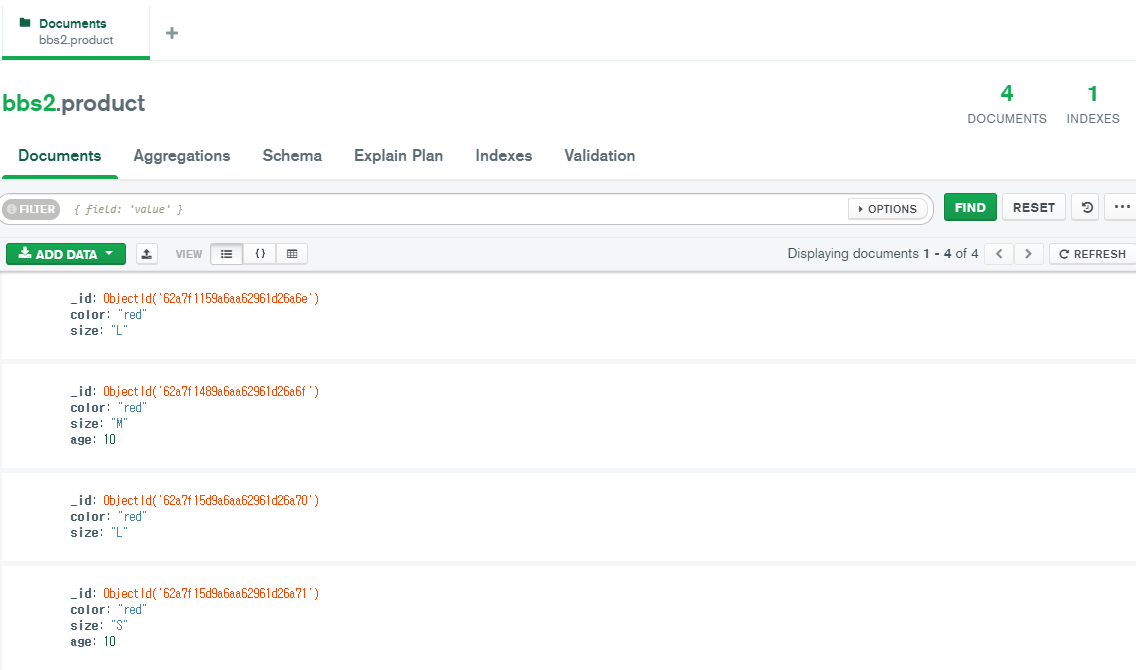

In [10]:
Image("image/bbs2_documents.png")

## Read

In [11]:
# 전체 검색
docs = product.find({})
for doc in docs:
    print(doc)

{'_id': ObjectId('62a7f814a538ca3a3f98ae9f'), 'color': 'red', 'size': 'L'}
{'_id': ObjectId('62a7f814a538ca3a3f98aea0'), 'color': 'red', 'size': 'M', 'age': 10}
{'_id': ObjectId('62a7f814a538ca3a3f98aea1'), 'color': 'red', 'size': 'L'}
{'_id': ObjectId('62a7f814a538ca3a3f98aea2'), 'color': 'red', 'size': 'S', 'age': 10}


In [12]:
# 조건에 따른 검색
docs2 = product.find({"age":10})
for doc in docs2:
    print(doc)

{'_id': ObjectId('62a7f814a538ca3a3f98aea0'), 'color': 'red', 'size': 'M', 'age': 10}
{'_id': ObjectId('62a7f814a538ca3a3f98aea2'), 'color': 'red', 'size': 'S', 'age': 10}


In [13]:
# 조건에 따른 검색2
docs2 = product.find({"size":"L"})
for doc in docs2:
    print(doc)

{'_id': ObjectId('62a7f814a538ca3a3f98ae9f'), 'color': 'red', 'size': 'L'}
{'_id': ObjectId('62a7f814a538ca3a3f98aea1'), 'color': 'red', 'size': 'L'}


## Update

In [14]:
# product.update_one({조건},{바꿀 내용})
product.update_one(
    {"age": 10},
    {
        "$set": 
            {"color": "blue"}
    }
)

In [15]:
# 조건에 따른 검색
docs4 = product.find({"age":10})
for doc in docs4:
    print(doc)

{'_id': ObjectId('62a7f814a538ca3a3f98aea0'), 'color': 'blue', 'size': 'M', 'age': 10}
{'_id': ObjectId('62a7f814a538ca3a3f98aea2'), 'color': 'red', 'size': 'S', 'age': 10}


In [16]:
# product.update_many({조건},{바꿀 내용})
product.update_many(
    {"size": "L"},
    {
        "$set": 
            {"color": "black"}
    }
)

In [17]:
# 조건에 따른 검색
docs5 = product.find({"size":"L"})
for doc in docs5:
    print(doc)

{'_id': ObjectId('62a7f814a538ca3a3f98ae9f'), 'color': 'black', 'size': 'L'}
{'_id': ObjectId('62a7f814a538ca3a3f98aea1'), 'color': 'black', 'size': 'L'}


In [18]:
# 전체 검색
docs6 = product.find({})
for doc in docs6:
    print(doc)

{'_id': ObjectId('62a7f814a538ca3a3f98ae9f'), 'color': 'black', 'size': 'L'}
{'_id': ObjectId('62a7f814a538ca3a3f98aea0'), 'color': 'blue', 'size': 'M', 'age': 10}
{'_id': ObjectId('62a7f814a538ca3a3f98aea1'), 'color': 'black', 'size': 'L'}
{'_id': ObjectId('62a7f814a538ca3a3f98aea2'), 'color': 'red', 'size': 'S', 'age': 10}


## Delete

In [19]:
# 하나의 특정 instance(documnets) 삭제!
product.delete_one({"size":"S"})

In [20]:
docs7 = product.find({})
for doc in docs7:
    print(doc)

{'_id': ObjectId('62a7f814a538ca3a3f98ae9f'), 'color': 'black', 'size': 'L'}
{'_id': ObjectId('62a7f814a538ca3a3f98aea0'), 'color': 'blue', 'size': 'M', 'age': 10}
{'_id': ObjectId('62a7f814a538ca3a3f98aea1'), 'color': 'black', 'size': 'L'}


In [21]:
# 2개 이상의 특정 instance(documents) 삭제!
product.delete_many({"size":"L"})

In [22]:
docs8 = product.find({})
for doc in docs8:
    print(doc)

{'_id': ObjectId('62a7f814a538ca3a3f98aea0'), 'color': 'blue', 'size': 'M', 'age': 10}


In [23]:
# 모든 instance(documents) 삭제!
product.delete_many({})

In [24]:
# 전체 documents 개수 조회
product.count_documents({})

0

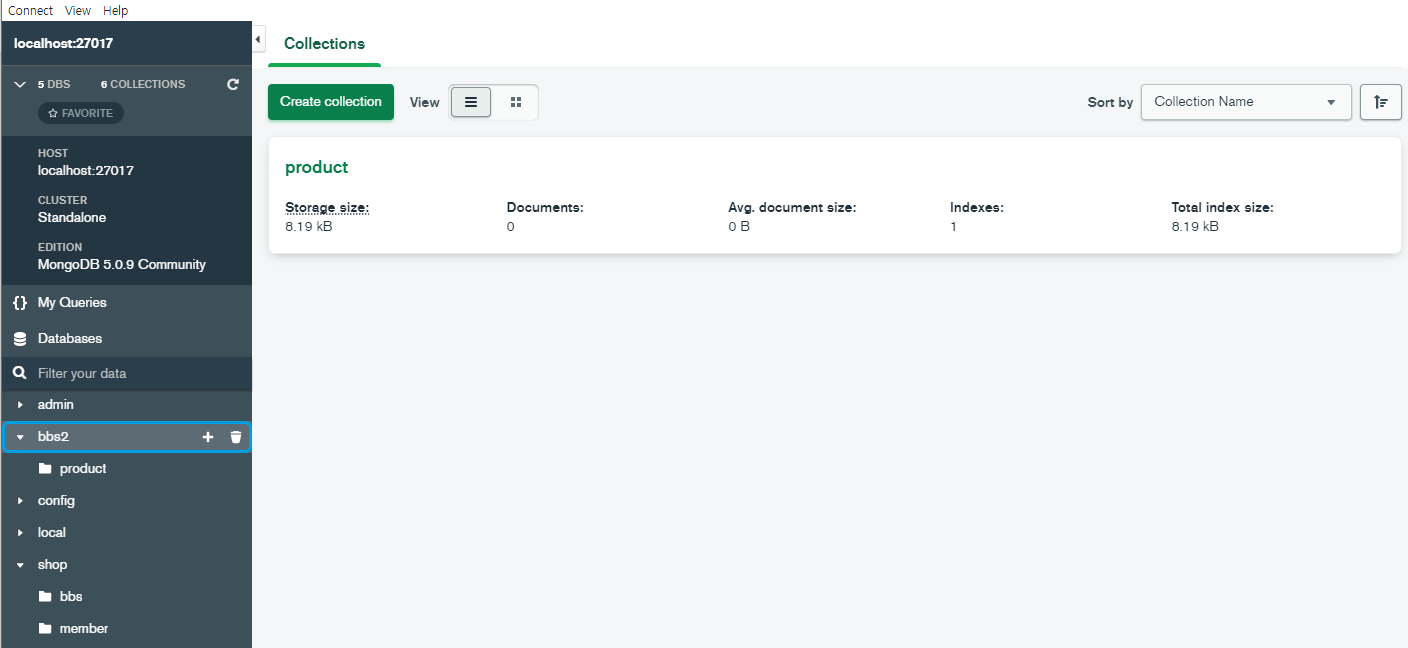

In [25]:
Image("image/bbs2_collection.png")

In [26]:
bbs2 = conn.bbs2
product = bbs2.product
fashion = bbs2.fashion
product.insert_one(data1)
fashion.insert_many(data3)

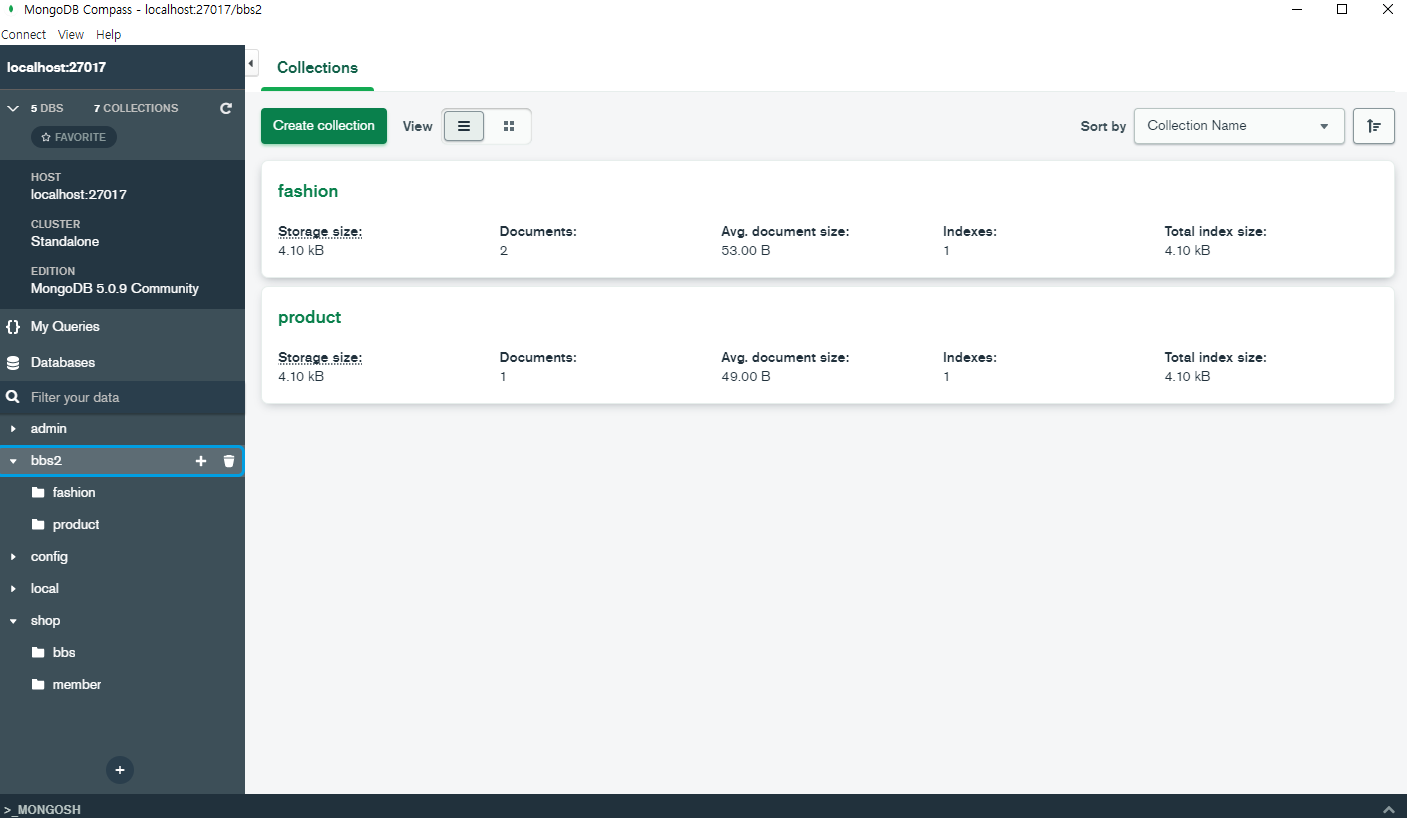

In [27]:
Image("image/mongodb_database_bbs2.png")

In [28]:
# collection 삭제
product.drop()

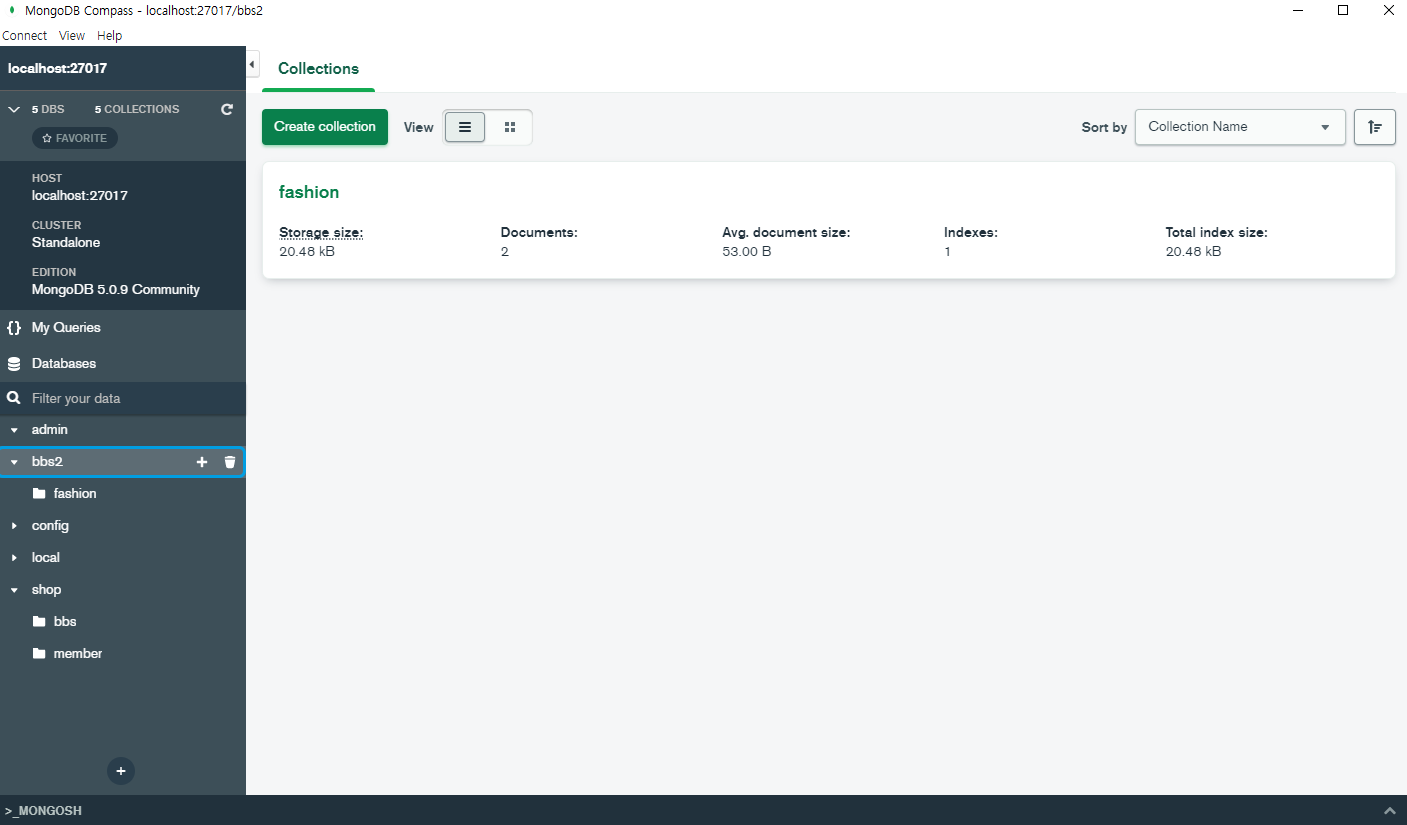

In [29]:
Image("image/bbs2_drop_product.png")

In [30]:
# bbs2라는 database 삭제하기
conn.drop_database('bbs2')

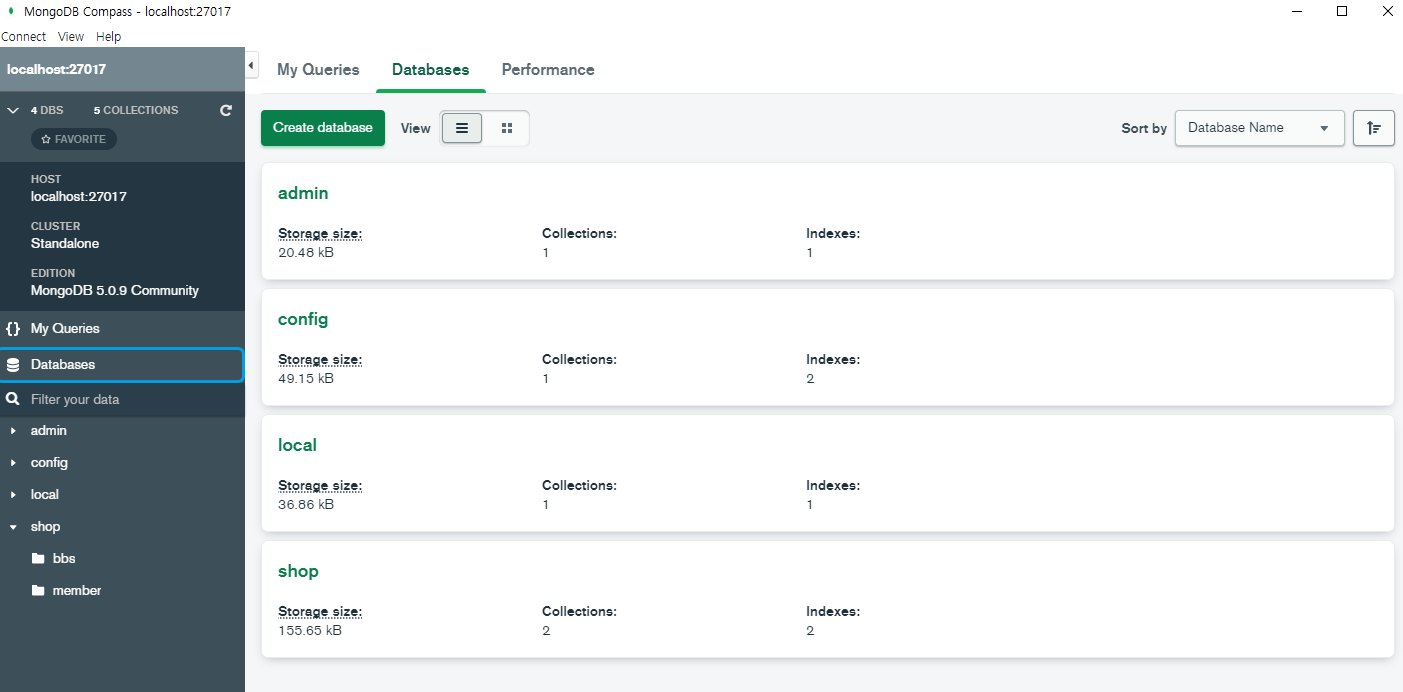

In [31]:
Image("image/mongodb_database.png")